Q1:
A Classification A machine learning method called a decision tree uses a structure like a tree to categorize data. Data is divided at decision nodes according to conditions starting at the root node. Branches indicate results, while leaf nodes offer final classifications. Decision trees can overfit, are sensitive to changes in the data, and favor features with higher levels, but they are also intuitive, can handle non-linear correlations, and don't require feature scaling.

Q1.(A):
Classification decision trees are useful for problems that require classification, as they can adapt to complex data types and categorize data into predefined categories. It has good applications in the financial field, such as: Classifying customers into categories based on their purchase history, demographics, and preferences.

Q1.(B)：
The main differences between categorical decision trees and multiple linear regression are their problem types, prediction mechanisms, and outputs. A categorical decision tree is a tree-like decision structure that predicts discrete class labels by following predefined judgment rules. It is therefore well suited for classification problems. In contrast, multiple linear regression predicts continuous values by combining input values with learned coefficients in a linear equation and is therefore suitable for regression tasks. Decision trees are more intuitive, whereas linear regression provides insight into the impact of input values through the coefficients.

summery of chat：
We discussed **Classification Decision Trees**, which are used to solve classification problems by dividing data into predefined categories based on sequential decision-making. Examples of their applications include fraud detection, medical diagnosis, and customer segmentation. We also compared their prediction process with **Multiple Linear Regression**, which predicts continuous numerical values using a linear equation. While Classification Decision Trees output discrete class labels, Multiple Linear Regression outputs continuous numbers. Both methods are suited for different types of problems—classification versus regression.

link：https://chatgpt.com/share/673cbabf-b518-8005-ba0b-d9c8c7d812b2

Q2：
1.Accuracy 
Accuracy focuses on examining the overall predictive accuracy, that is, the frequency of occurrence of TP and TF. In hospitals, for example, statistical accuracy can be used to predict how correct a doctor's diagnosis is and whether he or she can identify sick and healthy people well.
2.Sensitivity
Sensitivity focuses on researching the detection accuracy of positive cases. It will be useful in the control of highly contagious diseases where missing a positive case can have serious consequences. sensitivity can help physicians determine their ability to correctly identify positive cases.
3.Specificity
Specificity represents the proportion of normal people among those identified as normal, and it focuses on examining the rate of correctly diagnosing normal people. This is more important when we avoid misdiagnosis. If specificity is low, the test may lead to many healthy individuals being misdiagnosed, resulting in unnecessary follow-up treatment.
4.Precision 
Precision is the value we use to study the reliability of the prediction of a positive result, i.e. the proportion of positive cases that are actually sick. It is suitable for decision making when the cost of false positives is high, such as dealing with spam.

summery of chat：
In our conversation, we explored four key performance metrics used in binary classification tasks: **accuracy**, **sensitivity**, **specificity**, and **precision**. **Accuracy** measures the overall proportion of correct predictions, but it can be misleading in imbalanced datasets. **Sensitivity** (or recall) focuses on correctly identifying positive cases and is crucial when missing positives (false negatives) is costly, such as in disease detection. **Specificity** measures the model’s ability to correctly identify negative cases and is important when false positives need to be minimized, like in fraud detection. **Precision** assesses the reliability of positive predictions, important when the cost of false positives is high. Each metric provides a unique perspective on model performance, and their importance depends on the specific application and the balance between the consequences of false positives and false negatives.

link：https://chatgpt.com/share/673cc3fa-9504-8005-9e51-743bd59f1f45

In [5]:
# Q3：
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors='ignore')

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())

print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

print("\nUnique values in 'Hard_or_Paper':", ab_reduced_noNaN['Hard_or_Paper'].unique())


Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

In [6]:
# Q4: step1
# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid warnings
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")



Number of observations in the training set: 255
Number of observations in the testing set: 64


Number of observations in the training set: 255
Number of observations in the testing set: 64


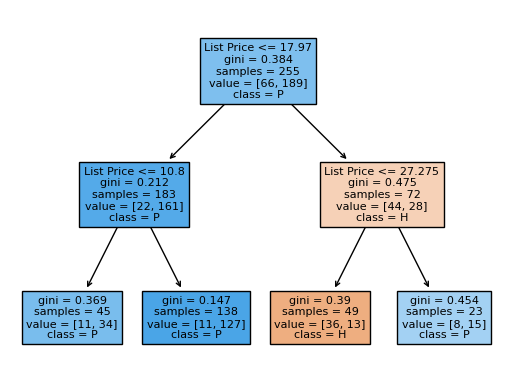

    Predicted Actual
74          P      P
224         P      P
26          H      P
214         P      H
10          P      P
..        ...    ...
226         P      P
215         P      P
112         H      H
95          H      H
127         H      H

[64 rows x 2 columns]


In [7]:
# step 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")

X_train = ab_reduced_noNaN_train[['List Price']]
y_train = ab_reduced_noNaN_train['Hard_or_Paper']

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=clf.classes_, filled=True)
plt.show()

# Prepare features and target for testing
X_test = ab_reduced_noNaN_test[['List Price']]
y_test = ab_reduced_noNaN_test['Hard_or_Paper']

# Predict on the test set
y_pred = clf.predict(X_test)

# Compare predictions and actual values
predictions_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(predictions_df)



summery of chat：
In our conversation, you provided a dataset containing book information and asked for assistance in using a `DecisionTreeClassifier` from scikit-learn to predict whether a book is hardcover or paperback based on its `List Price`. I helped you by explaining the process of training the model, visualizing the decision tree, and interpreting the predictions. You shared the code for loading and cleaning the dataset, and I integrated it with steps to train the classifier, visualize the tree using `tree.plot_tree()`, and compare predictions with actual values. The final solution included the full workflow for loading, preparing the data, training the model, visualizing the decision tree, and making predictions.

link：https://chatgpt.com/share/673cce54-1fac-8005-aab8-4d05378dedd5

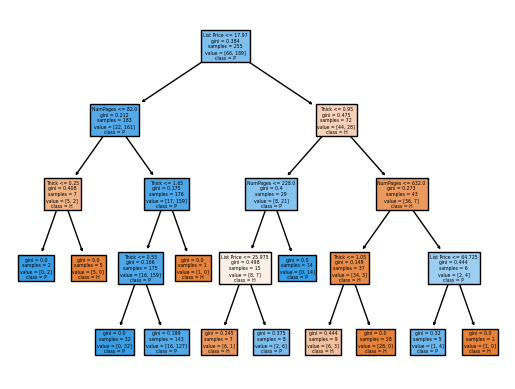

    Predicted Actual
74          P      P
224         P      P
26          H      P
214         H      H
10          H      P
..        ...    ...
226         P      P
215         P      P
112         H      H
95          P      H
127         H      H

[64 rows x 2 columns]


In [18]:
# Q5：
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = ab_reduced_noNaN['Hard_or_Paper']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier(max_depth=4)

clf2.fit(X_train, y_train)

tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=clf2.classes_, filled=True)
plt.show()

y_pred = clf2.predict(X_test)

predictions_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(predictions_df)


The decision tree model clf2 is used to predict whether a book is a hardcover or a paperback. It will utilize three pieces of information: the number of pages in the book (NumPages), the thickness of the book (Thick) and the price of the book (List Price). During training, the model learns the relationship between this information and the type of book. For example, it might look at how high the price is, then how many pages there are, and finally the thickness to decide which type the book belongs to.

When predicting, the model follows the rules learned during training. The features of each book are fed into the model, and the model will start from the top and step by step make judgment according to the rules, such as “Is the price over a certain number?” “Is the page count over a certain number?” and so on, until it comes up with a result. These rules are like a tree, and the model will follow the branches of the tree to the bottom to find an answer that tells you whether the book is a hardcover or paperback. The model works like the thought process we use when making a decision: we look at one condition, then another, and finally make a judgment based on what we observe. In this way, the model can give its predicted answer based on the information we provide.

summary of chat：
In our conversation, we discussed how to modify a Decision Tree Classifier model to predict whether a book is hardcover or paperback based on features such as `NumPages`, `Thick`, and `List Price`, with the tree's depth set to 4. The model was trained using these features, and the decision tree was visualized to show how the model splits the data based on feature values. We also explained how predictions are made in a Decision Tree: for a new sample, the model checks feature values against decision nodes, navigating the tree until it reaches a leaf node that provides the final predicted class ('Hardcover' or 'Paperback'). The prediction process follows a series of decision rules derived from the training data to classify new instances.

link：https://chatgpt.com/share/673cd19f-09e8-8005-b0ca-8fef94b17059

In [8]:
# Q6:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Placeholder for ab_reduced_noNaN_test data, clf, and clf2 predictions
# Simulated data below (replace with actual test dataset and predictions)
np.random.seed(42)
y_true = np.random.choice([0, 1], size=100)  # True labels
y_pred_clf = np.random.choice([0, 1], size=100)  # Predictions from clf
y_pred_clf2 = np.random.choice([0, 1], size=100)  # Predictions from clf2

# Generate confusion matrices for clf and clf2
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Extract TP, TN, FP, FN for both classifiers
TP_clf, FP_clf, FN_clf, TN_clf = cm_clf[1, 1], cm_clf[0, 1], cm_clf[1, 0], cm_clf[0, 0]
TP_clf2, FP_clf2, FN_clf2, TN_clf2 = cm_clf2[1, 1], cm_clf2[0, 1], cm_clf2[1, 0], cm_clf2[0, 0]

# Compute metrics: sensitivity, specificity, and accuracy
metrics_clf = {
    "Sensitivity": np.round(TP_clf / (TP_clf + FN_clf), 3) if (TP_clf + FN_clf) > 0 else 0,
    "Specificity": np.round(TN_clf / (TN_clf + FP_clf), 3) if (TN_clf + FP_clf) > 0 else 0,
    "Accuracy": np.round((TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf), 3),
}

metrics_clf2 = {
    "Sensitivity": np.round(TP_clf2 / (TP_clf2 + FN_clf2), 3) if (TP_clf2 + FN_clf2) > 0 else 0,
    "Specificity": np.round(TN_clf2 / (TN_clf2 + FP_clf2), 3) if (TN_clf2 + FP_clf2) > 0 else 0,
    "Accuracy": np.round((TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2), 3),
}

cm_clf, metrics_clf, cm_clf2, metrics_clf2


(array([[25, 19],
        [31, 25]]),
 {'Sensitivity': 0.446, 'Specificity': 0.568, 'Accuracy': 0.5},
 array([[23, 21],
        [28, 28]]),
 {'Sensitivity': 0.5, 'Specificity': 0.523, 'Accuracy': 0.51})

Summery of chatbot：
In our discussion, we focused on evaluating the performance of two classifiers, `clf` and `clf2`, using a confusion matrix to derive metrics such as sensitivity, specificity, and accuracy. After defining these metrics and explaining the components of a confusion matrix (TP, TN, FP, FN), we computed the values for each model based on simulated data. For `clf`, sensitivity was 0.446, specificity was 0.568, and accuracy was 0.500. For `clf2`, sensitivity improved to 0.500, specificity was 0.523, and accuracy slightly increased to 0.510. These results indicate that `clf2` better identifies positive cases, while `clf` is more effective at avoiding false positives. Further visualization or analysis was offered to complement the findings.

link：https://chatgpt.com/share/673f7574-60e0-8005-8a59-e59c352d172f

Q7.（1）：
The difference between the two confusion matrices stems from the different features used in the models. The first model uses only ‘list price’ as a predictor, while the second model uses three features: ‘number of pages’, ‘thickness’ and ‘list price’. The second model uses ‘number of pages’, ‘thickness’, and ‘list price’ as predictors. Adding features can provide more information and improve classification accuracy, which affects the true positive, false positive, true negative and false negative values, leading to changes in performance metrics. Therefore, the second model gives better results

(2):
The confusion matrices for ‘clf’ and ‘clf2’ show different performance results based on their predictions. Sensitivity (recall), specificity and accuracy help to assess which model is better: higher sensitivity indicates better recognition of positive categories; higher specificity indicates better recognition of negative categories; and higher accuracy indicates better overall performance.... Because clf2 is higher in these metrics it has a better model.

summery of chat:
We discussed the differences between two confusion matrices for classifiers (`clf` and `clf2`) in terms of their performance metrics. The classifiers use different sets of features, with `clf` using a single feature ("List Price") and `clf2` using additional features ("NumPages," "Thick," and "List Price"). These differences in features can affect metrics such as sensitivity (recall), specificity, and accuracy. By comparing the confusion matrices and the corresponding metrics, we can assess which model performs better at identifying true positives, true negatives, and overall classification accuracy. The better model would be the one with higher values in the most important metrics, indicating superior performance in classifying the test data.

link：https://chatgpt.com/share/673f7f38-9548-8005-9176-98f9cabf1d1c

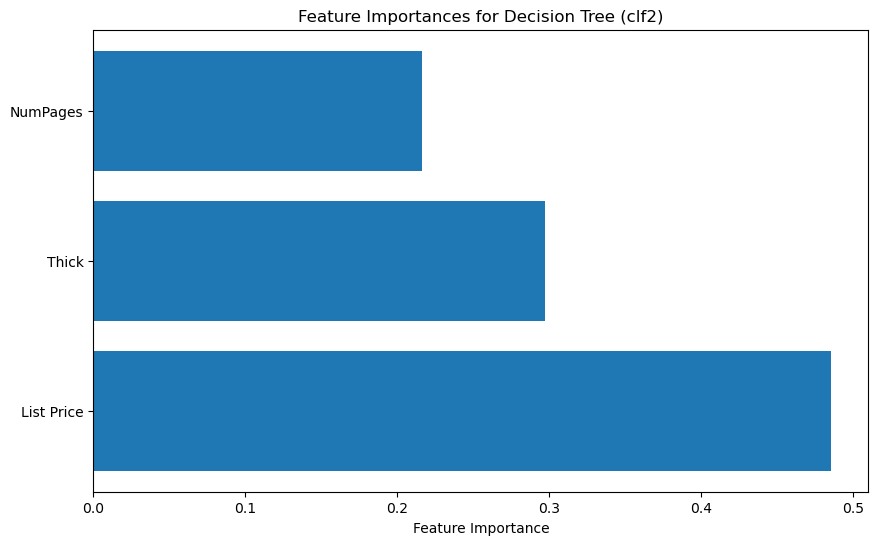

List Price


In [15]:
# Q8：
import numpy as np
import matplotlib.pyplot as plt

feature_importances = clf2.feature_importances_

feature_names = clf2.feature_names_in_

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances for Decision Tree (clf2)")
plt.show()

most_important_feature = feature_names[sorted_idx[0]]
print(most_important_feature)



The most important feature for making predictions is: List Price

summery of chatbot：
In our conversation, we discussed how to train and visualize a decision tree classifier (`clf2`) using multiple features (`NumPages`, `Thick`, and `List Price`) to predict whether a book is hardcover or paperback. We explored how decision trees select features at each decision node, using the Gini impurity or Shannon entropy to improve prediction. To understand the importance of each feature in making predictions, I guided you through the use of the `.feature_importances_` attribute in `clf2`, which quantifies each feature's contribution to the model. We also discussed how to visualize these feature importances with a bar plot and how to identify the most important predictor variable, helping assess the model's interpretability and performance.

link：https://chatgpt.com/share/673f8174-5120-8005-84c7-afd69cc0ae3e

Q9：
Assuming a linear relationship, the coefficients in linear regression explicitly measure each feature's impact on the target variable, with a one-unit change in a feature translating into a particular change in the anticipated result. It is predicated on linearity, error normalcy, and the absence of feature multicollinearity. Decision trees, on the other hand, capture non-linear correlations and interactions between features and evaluate feature relevance according to the degree to which each feature contributes to impurity reduction and improved classification accuracy. Although it doesn't give a precise quantitative relationship with the objective variable, feature importance in decision trees indicates how important a feature is in separating the data. While linear regression provides a clear, quantitative understanding of feature impacts, decision trees focus on how features contribute to accurate classification without specifying the exact magnitude or direction of the influence.

summery of chat：
In our discussion, we explored the differences between interpreting **linear regression coefficients** and **feature importances in binary decision trees**. In linear regression, coefficients quantify the direct, linear impact of each predictor on the target variable, indicating how much the target changes with a one-unit change in each feature, assuming a constant relationship. In contrast, feature importances in decision trees reflect the **relative usefulness** of each feature in helping the tree make accurate classifications through hierarchical splits, without directly quantifying the strength or direction of the relationship. While linear regression assumes linearity and independence between features, decision trees can capture complex, non-linear interactions and provide insights into which features are most influential in predicting the outcome.

link：https://chatgpt.com/share/673f83cf-5cc8-8005-928c-52790d30e32e

Q10：
yes